In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_and_process_data(filename):
    df = pd.read_csv(filename)
    X_raw = df.iloc[:, 0:2].values
    y = df.iloc[:, 2].values
    mu = np.mean(X_raw, axis=0)
    sigma = np.std(X_raw, axis=0)
    X_norm = (X_raw - mu) / sigma
    m = len(y)
    X = np.c_[np.ones(m), X_norm]

    return X, y, X_raw, mu, sigma

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (-1/m) * np.sum(y * np.log(h + epsilon) + (1-y) * np.log(1 - h + epsilon))
    return cost

In [4]:
def train_logistic_regression(X, y, learning_rate=0.1, iterations=2000):
    m = len(y)
    theta = np.zeros(X.shape[1])
    cost_history = []

    for i in range(iterations):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history

In [6]:
def predict(theta, speed, ammo, mu, sigma):
    input_data = np.array([speed, ammo])
    norm_data = (input_data - mu) / sigma
    features = np.r_[1.0, norm_data]

    probability = sigmoid(np.dot(features, theta))
    return probability

In [13]:
filename = '/content/zombies_data - Sheet1.csv'
X, y, X_raw, mu, sigma = load_and_process_data(filename)

theta, cost_history = train_logistic_regression(X, y, learning_rate=0.5, iterations=1000)

print(f"Calculated Weights (Theta): {theta}")

test_speed = 25
test_ammo = 1
prob = predict(theta, test_speed, test_ammo, mu, sigma)
label = "SURVIVE" if prob >= 0.5 else "INFECTED"

print("-" * 30)
print(f"Runner Profile: Speed {test_speed} km/h, {test_ammo} Ammo Clip")
print(f"Survival Probability: {prob}")
print(f"Prediction: {label}")
print("-" * 30)

Calculated Weights (Theta): [1.66733825 7.86965195 5.65637421]
------------------------------
Runner Profile: Speed 25 km/h, 1 Ammo Clip
Survival Probability: 0.9999568282648451
Prediction: SURVIVE
------------------------------


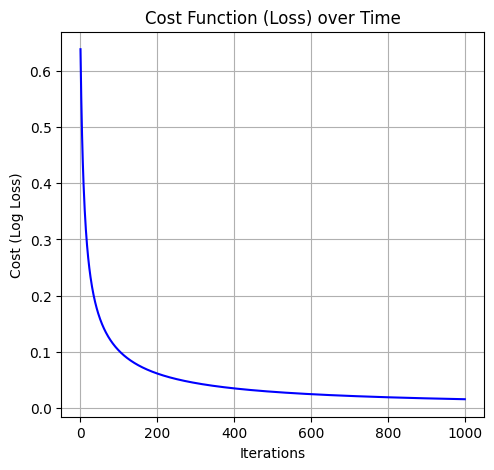

In [14]:
# 2: Visualize Cost Dropping
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cost_history, color='blue')
plt.title('Cost Function (Loss) over Time')
plt.xlabel('Iterations')
plt.ylabel('Cost (Log Loss)')
plt.grid(True)

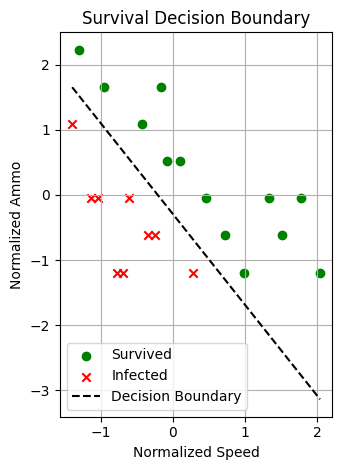

In [15]:
plt.subplot(1, 2, 2)
pos = y == 1
neg = y == 0
plt.scatter(X[pos, 1], X[pos, 2], c='green', marker='o', label='Survived')
plt.scatter(X[neg, 1], X[neg, 2], c='red', marker='x', label='Infected')

# Calculate Decision Boundary Line
x1_vals = np.array([X[:, 1].min(), X[:, 1].max()])
x2_vals = -(theta[0] + theta[1] * x1_vals) / theta[2]

plt.plot(x1_vals, x2_vals, "k--", label="Decision Boundary")
plt.xlabel('Normalized Speed')
plt.ylabel('Normalized Ammo')
plt.title('Survival Decision Boundary')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()